<center><img src="imgs/salta.png" alt="En escencia, yo." width="1000"></center>


# <center>  ASTROMETRÍA I - **VÍCTOR RUBÉN SANDEZ** 

## **Profesores**: Mariano Dominguez - Mario Agustín Sgró
## **Ayudante Alumno**: Román Ciro Martín

### <center> **TRABAJO PRÁCTICO N°1** : _Probabilidad y generación de números aleatorios_



#### Este notebook será el paso a paso de como se fueron resolviendo los distintos ejercicios realizados durante el práctico de la asignatura **Astrometría I** de la carrera *_Licenciatura en Astronomía_* de la Facultad de Matemáticas, Astronomía, Física  y Computación de la Universidad Nacional de Córdoba.

#### Sobre todo, funcionará como bitácora de trabajo, que luego será volcada en un informe escrito a presentar para su posteriro evaluación.

### Objetivos:
- #### Implementar generadores de números aleatorios
- #### Analizar propiedades estadísticas de secuencias generadas
- #### Resolver problemas de probabilidad mediante simulaciones
- #### Aplicar conceptos estadísticos en contextos astronómicos

#### **ADVERTENCIA**: Mucho de este trabajo está claramente hecho con ayuda de un LLM

## Introducción: ¿Por qúe numeros aleatorios?

#### La generación de números aleatorios y el estudio de métodos probabilísticos constituyen pilares fundamentales en la astroestadística moderna. En un campo donde los fenómenos observados son intrínsecamente estocásticos y donde los experimentos controlados son imposibles de realizar, la capacidad de simular procesos astronómicos mediante números aleatorios se convierte en una herramienta indispensable.

#### El dominio de estas técnicas no es meramente académico; constituye una habilidad práctica esencial para cualquier astrofísico moderno. La capacidad de generar, validar y utilizar secuencias aleatorias de alta calidad diferencia entre resultados científicos robustos y conclusiones potencialmente erróneas. Este estudio sienta las bases para métodos computacionales más avanzados que son estándar en la investigación astronómica contemporánea.



## Python: El Lenguaje de la Astronomía Contemporánea

#### La revolución computacional en astronomía ha encontrado en Python su plataforma por defecto para desarrollarse. La elección de Python como lenguaje principal para estos ejercicios no es arbitraria sino que responde a razones pragmáticas que lo han convertido en el estándar de facto en la investigación astronómica mundial. Mucha gente cuestiona al dia de hoy esta decisión colectiva, proponiendo alternativas que poco satisfacen las necesidades de los usuarios investigadores.

## Ventajas Estratégicas de Python

#### A lo largo de los años la comunidad de usuarios de Python a generado un ecosistema para el desarrollo de la ciencia sin precedentes, y es por eso que su uso se ha extendido tanto. La generación de _librerias_ de uso público han facilitado el trabajo de todos.

##### Python ofrece un ecosistema incomparable para cálculo científico como, por ejemplo:

    NumPy: Operaciones vectorizadas eficientes con arrays multidimensionales

    SciPy: Algoritmos matemáticos avanzados y optimizados

    Matplotlib/Seaborn: Visualización científica de alta calidad

    Astropy: Librería específicamente diseñada para astronomía

##### Entre otras muchas cosas podemos decir que, Python ha democratizado el acceso a herramientas computacionales avanzadas que antes estaban reservadas para especialistas en computación. Hoy, cualquier astrónomo puede implementar algoritmos complejos, analizar terabytes de datos y realizar simulaciones sofisticadas gracias a este ecosistema.

##### Esta combinación de poder computacional, accesibilidad y robustez estadística hace de Python la elección ideal para formar a la próxima generación de astrofísicos computacionales.



#### **RECOMENDACIÓN** : Ejecutar _Run All_ a partir de acá para poder ver todos los codigos a la par que se lee el texto :D

In [177]:
# En el siguiente código se importan las librerías necesarias para el
# análisis de datos y la visualización.
# Dichos paquetes incluyen herramientas para manipulación de datos, 
# cálculos numéricos, gráficos y visualización avanzada.

# En esta ocasión solo se importan las librerias utiles para el desarrollo del practico 1 de astrometria 1

import numpy as np
import matplotlib.pyplot as plt


### Generación de Números Aleatorios Uniformes

#### El Ejercicio 18 nos introduce en el corazón de la generación de números pseudoaleatorios mediante el método de congruencia lineal, uno de los algoritmos más fundamentales en la historia de la simulación computacional. Este ejercicio no solo tiene valor histórico, sino que sienta las bases para entender cómo las computadoras generan "aleatoriedad" controlada.

#### La importancia de este algoritmo radica en la necesidad de simular distribuciones, generar catalogos sintéticos, realizar integraciones Monte Carlo, crear muestras de control para experimentos, etc.

<center><img src="imgs/p1_e18.png" alt="Practico 1 - Ejercicio 18" width="800"></center>

##### (a) Programa para generar números aleatorios en el rango [0,1] usando el método de congruencia lineal

##### Breve recordatorio del método de congruencia lineal

Siguiendo la bibliografía de la materia, particularmente *"The Nature of Mathematical Modelling"* de Neil Gershenfeld, entendemos al **Generador Lineal Congruencial** de números aleatorios (y sus variantes) como una técnica fundamental para la producción de números pseudoaleatorios en computación.

El método se define mediante la fórmula de recurrencia:

\[
$x_{n+1} = (a \cdot x_n + b) \mod M$
\]

Esta ecuación lineal, aparentemente simple, genera secuencias de números que exhiben pseudoaleatoriedad. Sin embargo, es crucial reconocer que detrás de esta apariencia aleatoria se esconden patrones determinísticos, cuya detección requiere un análisis estadístico riguroso.

##### Variables del modelo

- **$x_n$**: Estado actual (semilla inicial cuando $n=0$)
- **$a$**: Multiplicador (*multiplier*)
- **$b$**: Incremento (*increment*)
- **$M$**: Módulo (*modulus*)

La elección de estos parámetros es crítica para la calidad del generador. Dada una semilla inicial, se deben seleccionar parámetros que minimicen las correlaciones seriales y maximicen el período de la secuencia generada.

###### **Nota**: Los nombres de variables utilizados aquí pueden diferir de otras notaciones encontradas en la literatura, pero representan los mismos conceptos fundamentales.

##### Objetivo

La finalidad es implementar este algoritmo de manera que, al iterar la operación, se obtenga una secuencia de números en el rango [0,1] con correlaciones mínimas a escalas grandes, adecuada para aplicaciones astroestadísticas.

In [178]:
# Generador de congruencias lineales
# Definiremos la función para posteriormente generar números pseudoaleatorios

def gcl (x0, a, c, m, n):
    """
    Generador de Congruencias Lineales.
    
    Parámetros
    ----------
    x0 : tipo int
        Semilla inicial.
    a : tipo int
        Multiplicador.
    c : tipo int
        Incremento.
    m : tipo int
        Módulo.
    n : tipo int
        Cantidad de números a generar.

    Retorna
    -------
    list
        Lista con los números pseudoaleatorios generados.
    """
    x = x0
    numeros = []
    for i in range(n):
        x = (a * x0 + c) % m
        numeros.append(x)
    return numeros

#Vemos que no está normalizado entre 0 y 1, por lo que obtenemos numeros entero entre 0 y m-1

###### **Nota**: Todas las funciones generadas serán luego guardadas en el script rubfx.py, para posteriormente utilizarlas de forma adecuada.

In [179]:
import rubfx as rfx # Importamos las funciones que hemos creado en el script rubfx.py


#### Ahora implementamos la función en los distintos casos propuestos

In [180]:
# Invoco a la funcion generadora de cogruencias lineales en los distintos casos propuestos

# tengo que llamarla como rfx.gcl(semilla, multiplicador, incremento, modulo, cantidad de numeros) 

z1 = rfx.gclz(10, 57, 1, 256, 10) # Caso 1
z2 = rfx.gclz(11, 57, 1, 256, 10) # Caso 2
z3 = rfx.gclz(12, 57, 1, 256, 10) # Caso 3

#Vamos variando la semilla

print("Caso 1: ", z1)
print("Caso 2: ", z2)
print("Caso 3: ", z3)

Caso 1:  [59, 36, 5, 30, 175, 248, 57, 178, 163, 76]
Caso 2:  [116, 213, 110, 127, 72, 9, 2, 115, 156, 189]
Caso 3:  [173, 134, 215, 224, 225, 26, 203, 52, 149, 46]


No vemos a simple vista correlación entre los números arrojados por la función. 
Ahora veamos que pasa si dichos numeros son enteros. Definimos la misma función que antes, pero esta vez dividiendo por el modulo de congruencia donde trabajamos. Así obtendremos un generador lineal de congruencia que arroje numeros entre 0 y 1.

In [181]:
# Invoco a la funcion generadora de cogruencias lineales en los distintos casos propuestos

# tengo que llamarla como rfx.gclr(semilla, multiplicador, incremento, modulo, cantidad de numeros) 
# usamos el índice r para decir que nos va a dar un numero real

z1 = rfx.gclr(10, 57, 1, 256, 10) # Caso 1
z2 = rfx.gclr(11, 57, 1, 256, 10) # Caso 2
z3 = rfx.gclr(12, 57, 1, 256, 10) # Caso 3

#Vamos variando la semilla

print("Caso 1: ", z1)
print("Caso 2: ", z2)
print("Caso 3: ", z3)

Caso 1:  [0.23046875 0.140625   0.01953125 0.1171875  0.68359375 0.96875
 0.22265625 0.6953125  0.63671875 0.296875  ]
Caso 2:  [0.453125   0.83203125 0.4296875  0.49609375 0.28125    0.03515625
 0.0078125  0.44921875 0.609375   0.73828125]
Caso 3:  [0.67578125 0.5234375  0.83984375 0.875      0.87890625 0.1015625
 0.79296875 0.203125   0.58203125 0.1796875 ]


Ahora nos interesa calcular el periodo de repetición de estos numeros, dado los parámetros propuestos. Para esto implementamos un algoritmo básico para tratar de determinar en cuanto tiempo el algoritmos se repite. Veremos que el periodo está directamente asociado al módulo en el que estamos trabajando.

In [182]:
# Ahora nos interesa calcular el periodo de repetición de estos numeros, dado los parámetros propuestos. Para esto implementamos un algoritmo básico para tratar de determinar en cuanto tiempo el algoritmos se repite.
# tenemos que usar la función que nos da numeros enteros, ya que si usamos la que nos da numeros entre 0 y 1, nunca se va a repetir exactamente el mismo numero
# por lo que no vamos a poder encontrar el periodo de repetición

x0 = 10
numeros = rfx.gclz(x0, 57, 1, 256, 1000)

"""
Buscamos el primer número que se repite, que debería ser el mismo que la semilla inicial
Entonces el periodo de repetición es el índice de ese número + 1 (porque el índice empieza en 0)

El algoritmo es muy basico, lo que hace es recorrer la lista de numeros y buscar el primer número que sea igual a la semilla inicial
Cuando lo encuentra, imprime el índice + 1 y termina el bucle
"""
for i,n in enumerate(numeros):
    if n == x0:
        print("El periodo de repetición es: ", i+1)
        break

print(numeros)

El periodo de repetición es:  256
[59, 36, 5, 30, 175, 248, 57, 178, 163, 76, 237, 198, 23, 32, 33, 90, 11, 116, 213, 110, 127, 72, 9, 2, 115, 156, 189, 22, 231, 112, 241, 170, 219, 196, 165, 190, 79, 152, 217, 82, 67, 236, 141, 102, 183, 192, 193, 250, 171, 20, 117, 14, 31, 232, 169, 162, 19, 60, 93, 182, 135, 16, 145, 74, 123, 100, 69, 94, 239, 56, 121, 242, 227, 140, 45, 6, 87, 96, 97, 154, 75, 180, 21, 174, 191, 136, 73, 66, 179, 220, 253, 86, 39, 176, 49, 234, 27, 4, 229, 254, 143, 216, 25, 146, 131, 44, 205, 166, 247, 0, 1, 58, 235, 84, 181, 78, 95, 40, 233, 226, 83, 124, 157, 246, 199, 80, 209, 138, 187, 164, 133, 158, 47, 120, 185, 50, 35, 204, 109, 70, 151, 160, 161, 218, 139, 244, 85, 238, 255, 200, 137, 130, 243, 28, 61, 150, 103, 240, 113, 42, 91, 68, 37, 62, 207, 24, 89, 210, 195, 108, 13, 230, 55, 64, 65, 122, 43, 148, 245, 142, 159, 104, 41, 34, 147, 188, 221, 54, 7, 144, 17, 202, 251, 228, 197, 222, 111, 184, 249, 114, 99, 12, 173, 134, 215, 224, 225, 26, 203, 52, 149, 

Parece un periodo corto en comparación a lo esperado. ¿Es utilizable este generado? ¿Hay forma de visualizar dicha correlación? Una forma simple de ver esto es graficar los puntos en función de los pasos dados.

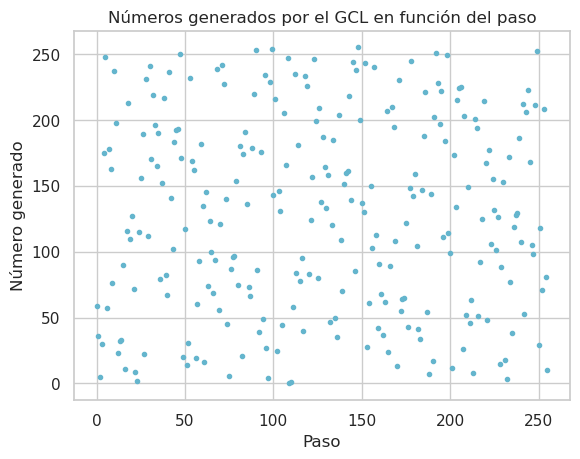

In [183]:
# Gramos un gráfico de los números generados en función del paso dado

#Volvemos a definir los numeros a graficar, esta vez mas

plotnumeros = rfx.gclz(10, 57, 1, 256, 256)

plt.plot(plotnumeros, 'c.')
plt.xlabel('Paso')
plt.ylabel('Número generado')
plt.title('Números generados por el GCL en función del paso')
plt.show()

Aunque un ojo entrenado pueda notar ciertos patrones, a simple vista no hay ninguna correlación obvia, estamos en una escala donde pareciera que existe todavia esta pseudoaleatoriedad.

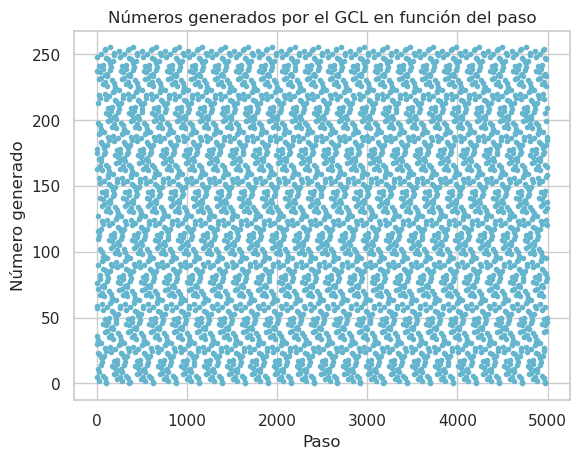

In [184]:
# Gramos un gráfico de los números generados en función del paso dado

#Volvemos a definir los numeros a graficar, esta vez muchos más

plotnumeros = rfx.gclz(10, 57, 1, 256, 5000)

plt.plot(plotnumeros, 'c.')
plt.xlabel('Paso')
plt.ylabel('Número generado')
plt.title('Números generados por el GCL en función del paso')
plt.show()

Aumentando el numero de datos vemos de manera obvia que el patron tiende a repetirse, lo cual nos deja clarisimo que esta función es _determinista_. Cambiando distintas variables, como la semilla, o el modulo vemos patrones mas o menos notables.

Para determinar estas correlaciones deberiamos analizar la distribuciones de puntos a lo largo de la generación de puntos. Para esto podriamos ver un histograma de las distribuciones generadas.

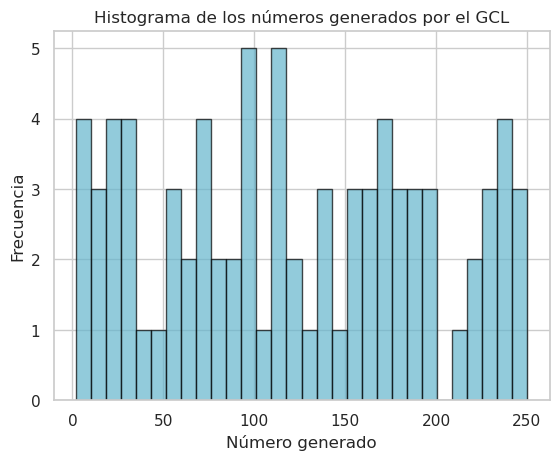

In [185]:
#Histograma de los números generados

plotnumeros = rfx.gclz(10, 57, 1, 256, 80)

plt.hist(plotnumeros, bins=30, color='c', edgecolor='black', alpha=0.7)
plt.xlabel('Número generado')
plt.ylabel('Frecuencia')
plt.title('Histograma de los números generados por el GCL')
plt.show()  

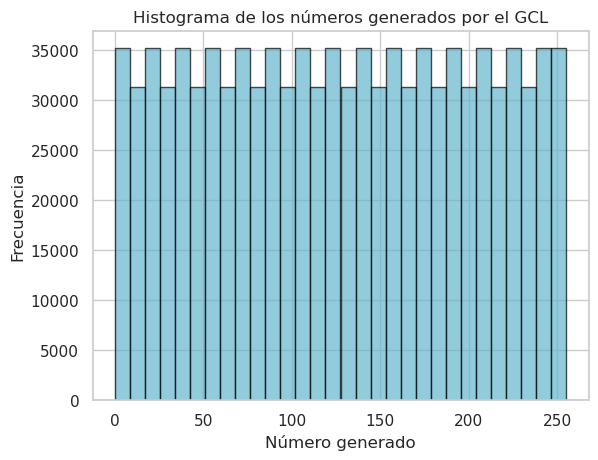

In [186]:
#Histograma de los números generados

plotnumeros = rfx.gclz(10, 57, 1, 256, 1000000)

plt.hist(plotnumeros, bins=30, color='c', edgecolor='black', alpha=0.7)
plt.xlabel('Número generado')
plt.ylabel('Frecuencia')
plt.title('Histograma de los números generados por el GCL')
plt.show()  

Con pocos números vemos que no hay una tendencia clara, sin embargo veamos que pasa al aumentar la cantidad de números generados. Se detecta pequeñas variaciones dentro de la normalidad, relacionada a la _ley de grandes números_.

En definitvia esta elección de números no es la adecuada para trabajar con pseudoaleatoriedad.

##### **Nota**: 

Todos estos defectos son generados por nuestra elección de constantes que definen el generador.

A lo largo de los años hemos podido encontrar mejores parámetros donde estos patrones son dificiles de detectar. No solo son mejores en cuanto a _aleatoriedad_, sino tambien son mas eficientes en terminos computacionales.

Uno de los más famosos es el propuesto por W. Press en el libro _Numerical Recipes_, donde se toman los siguientes valores:

##### Variables del modelo

- **$x_n$**: Estado actual (semilla inicial cuando $n=0$)
- **$a = 1664525$**: Multiplicador (*multiplier*)
- **$b = 1013904223$**: Incremento (*increment*)
- **$M = 2^{32}$**: Módulo (*modulus*)

Veamos entonces como se comporta.



In [187]:
# Nuevos numeros generados con otros parametros

#Seguimos utilizando el numero 10 como semilla, pero cambiamos el multiplicador a 45, y el incremento a 1, y el modulo a 256
#Notamos que seguimos en el caso donde calculamos numeros enteros entre 0 y m-1

nrz1 = rfx.gclz(10, 1664525, 1013904223, 2**32, 10) # Caso 1
nrz2 = rfx.gclz(11, 1664525, 1013904223, 2**32, 10) # Caso 2
nrz3 = rfx.gclz(12, 1664525, 1013904223, 2**32, 10) # Caso 3

# Printeamos los nuevos numeros generados
print("Nuevos números generados con otros parámetros:")
print("Caso 1: ", nrz1)
print("Caso 2: ", nrz2)
print("Caso 3: ", nrz3)

Nuevos números generados con otros parámetros:
Caso 1:  [1030549473, 797165516, 2863095995, 163339998, 209336485, 424841664, 2809322015, 3442696434, 2555202473, 671228148]
Caso 2:  [1032213998, 1186735221, 1508928336, 322324079, 3071787266, 3636235385, 365644676, 3082576147, 445150038, 917967549]
Caso 3:  [1033878523, 1576304926, 154760677, 481308160, 1639270751, 2552661810, 2216934633, 2722455860, 2630064899, 1164706950]


In [188]:
# Hacemos lo mismo para numeros entre 0 y 1

nrr1 = rfx.gclr(10, 1664525, 1013904223, 2**32, 10) # Caso 1
nrr2 = rfx.gclr(11, 1664525, 1013904223, 2**32, 10) # Caso 2
nrr3 = rfx.gclr(12, 1664525, 1013904223, 2**32, 10) # Caso 3

# Printeamos los nuevos numeros generados

print("Nuevos números generados con otros parámetros (entre 0 y 1):")
print("Caso 1: ", nrr1)
print("Caso 2: ", nrr2)
print("Caso 3: ", nrr3)

# A simple vista no hay ninguna correlación obvia, 
# estamos en una escala donde pareciera que existe
#  todavia esta pseudoaleatoriedad.

Nuevos números generados con otros parámetros (entre 0 y 1):
Caso 1:  [0.2399435  0.18560456 0.66661648 0.03803056 0.04873995 0.09891616
 0.65409625 0.80156523 0.59492944 0.15628248]
Caso 2:  [0.24033105 0.27630833 0.35132476 0.07504692 0.71520621 0.84662703
 0.08513329 0.71771819 0.10364457 0.21373098]
Caso 3:  [0.2407186  0.36701209 0.03603303 0.11206329 0.38167246 0.59433789
 0.51617032 0.63387115 0.6123597  0.27117947]


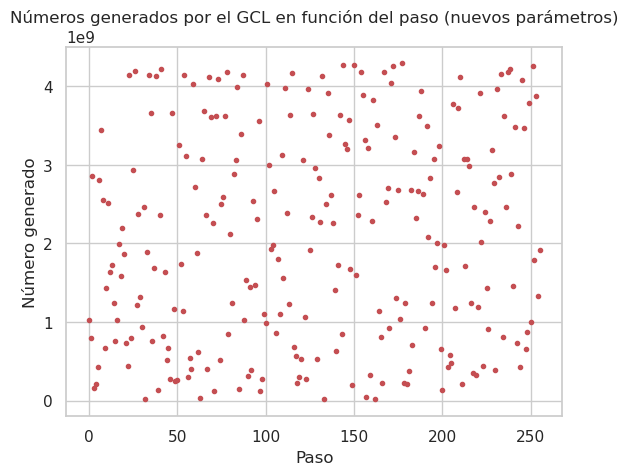

In [189]:
#Ahora buscamos graficar la distribución de estos nuevos números generados con otros parámetros para pequeños y altos valores de n

plotnumeros = rfx.gclz(10, 1664525, 1013904223, 2**32, 256)
plt.plot(plotnumeros, 'r.')
plt.xlabel('Paso')
plt.ylabel('Número generado')
plt.title('Números generados por el GCL en función del paso (nuevos parámetros)')
plt.show()

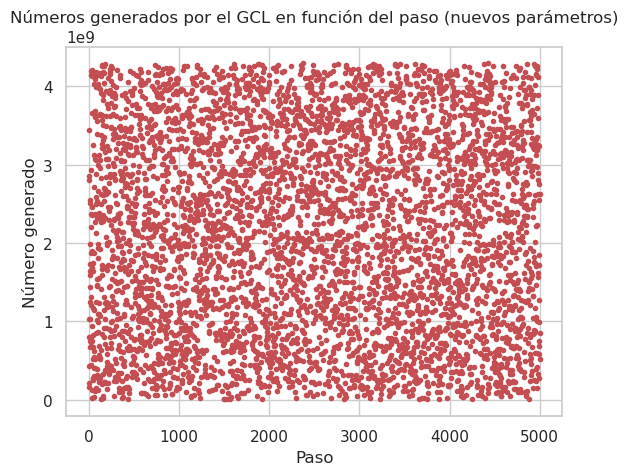

In [190]:
#Ahora con mas números

plotnumeros = rfx.gclz(10, 1664525, 1013904223, 2**32, 5000)
plt.plot(plotnumeros, 'r.')
plt.xlabel('Paso')
plt.ylabel('Número generado')
plt.title('Números generados por el GCL en función del paso (nuevos parámetros)')
plt.show()

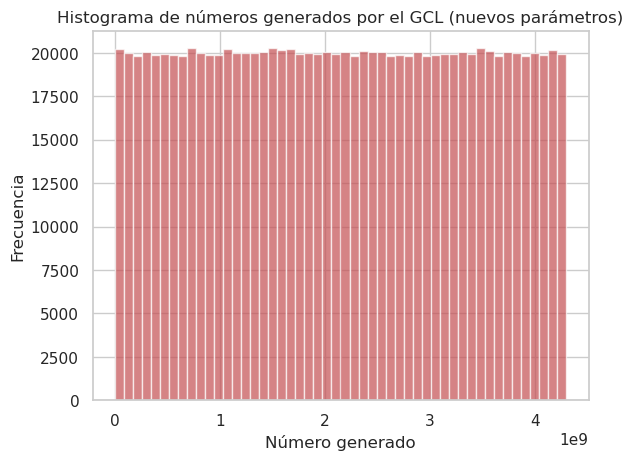

In [191]:
# Analizamos la distribución de los números generados mediante un histograma

#Nuevamente usamos 1.000.000 de números para ver si la distribución es uniforme
#El modelo utilizado converge a la uniformidad con un número suficientemente grande de datos

plotnumeros = rfx.gclz(10, 1664525, 1013904223, 2**32, 1000000)
plt.hist(plotnumeros, bins=50, color='r', alpha=0.7)
plt.xlabel('Número generado')
plt.ylabel('Frecuencia')
plt.title('Histograma de números generados por el GCL (nuevos parámetros)')
plt.show()

Con esta nueva distribución la aleatorieda pareciera estar practicamente asegurada, las correlaciones no son obvias y solo un analisis suficientemente bueno podria detectarlas. Los defectos de la anterior distribución dejan de ser tan notables.

#### Momentos teóricos y empíricos:
Otra forma de analizar la distribución, particularmente aquella donde vemos números entre 0 y 1, es analizando los _momentos_ de la distribución. Una medida estadística que nos ayuda a comprar el comportamiento real con el comportamiento "teorico" esperado.

Para una distribución teorica continua, uniforme donde $f(x)=1$ en [0,1] tenemos por definición:

Momento de orden $k$ teórico

<center>

$\mu_{k}=E[X^k] = \int_0^1 x^k \cdot 1  dx = \frac{1}{k+1}$

</center>

Al contar con una distribución discreta, la integral se convierte en una sumatoria, definida como momento empírico:

<center>

$\hat{\mu}_k = \frac{1}{n} \sum_{i=1}^n x_i^k$

</center>

El objetivo de todo esto es ver que, en el infinito, a mayor numero de n vale $ \mu_{k} = \hat{\mu}_k$. Entonces podemos decir que:

<center>

$\lim_{n \to \infty} \hat{\mu}_k = \mu_{k}$

</center>

<center>

$\lim_{n \to \infty} \frac{1}{n} \sum_{i=1}^n x_i^k = \int_0^1 x^k \cdot 1  dx $

</center>

Numericamente podriamos intentar corroborar esta afirmación. Veamos entonces que se cumple: 

<center>

$\lim_{n \to \infty} \frac{1}{n} \sum_{i=1}^n x_i^k = \frac{1}{k+1}$

</center>





In [192]:
#Calculamos los momentos empíricos de la distribución obtenida

def momento_empirico(data, k):
    """
    Calcula el k-ésimo momento empírico de una distribución de datos.
    
    Parámetros
    ----------
    data : list o array
        Lista o array de datos.
    k : int
        Orden del momento a calcular.

    Retorna
    -------
    float
        Valor del k-ésimo momento empírico.
    """
    n = len(data) # Número de datos
    return sum(x**k for x in data) / n

# Calculamos y comparamos los momentos teóricos y empíricos para k=1,2,3,4,5,6,7


In [193]:
#Los momentos teoricos esta dados por la función rfx.momt(k)

# Imprimimos los resultados
for i in range(1, 9):
    mom_teo = rfx.momt(i)
    print(f"Momento teórico k={i}: {mom_teo}")

#Estos son los momentos teóricos, ahora calculamos los momentos empíricos para diferentes tamaños de muestra

tamaños_muestra = [10, 100, 1000, 10000, 100000, 1000000]

for n in tamaños_muestra:
    datos = rfx.gclr(10, 1664525, 1013904223, 2**32, n) # Generamos n números pseudoaleatorios
    print(f"\nTamaño de muestra: {n}")
    for k in range(1, 9):
        mom_emp = momento_empirico(datos, k)
        print(f"Momento empírico k={k}: {mom_emp}")



Momento teórico k=1: 0.5
Momento teórico k=2: 0.3333333333333333
Momento teórico k=3: 0.25
Momento teórico k=4: 0.2
Momento teórico k=5: 0.16666666666666666
Momento teórico k=6: 0.14285714285714285
Momento teórico k=7: 0.125
Momento teórico k=8: 0.1111111111111111

Tamaño de muestra: 10
Momento empírico k=1: 0.3484724601963535
Momento empírico k=2: 0.1998719751798058
Momento empírico k=3: 0.13268240809954343
Momento empírico k=4: 0.09238107387983602
Momento empírico k=5: 0.06579152917899436
Momento empírico k=6: 0.0475891146609203
Momento empírico k=7: 0.034876202761246006
Momento empírico k=8: 0.025862440464695623

Tamaño de muestra: 100
Momento empírico k=1: 0.44104308729525654
Momento empírico k=2: 0.29107634499744683
Momento empírico k=3: 0.22325242485377228
Momento empírico k=4: 0.1843160445125404
Momento empírico k=5: 0.15880740113077668
Momento empírico k=6: 0.14062446148608948
Momento empírico k=7: 0.12687516106007832
Momento empírico k=8: 0.11601431958751834

Tamaño de muestra

Notamos como a medida que aumentamos la cantidad de numeros generados, mas cercanos se vuelven los valores al valor teórico. Pero tambien podemos compara esto en función de los errores.

Definimos el error absoluto entre las cantidades como:

<center>


$\epsilon_k^{\text{abs}} = \left| \hat{\mu}_k - \mu_k \right|$


</center>

En este, mientras menor sea el numero de $\epsilon_k^{\text{abs}}$, mejor es la aproximación.

De esta manera podemos graficar y ver como evolucionan los errores en función de la cantidad de muestras que tengamos.




In [194]:
#Calculamos el error relativo entre los momentos teóricos y empíricos

print("\nError relativo entre momentos teóricos y empíricos:")
for n in tamaños_muestra:
    datos = rfx.gclr(10, 1664525, 1013904223, 2**32, n) # Generamos n números pseudoaleatorios
    print(f"\nTamaño de muestra: {n}")
    for k in range(1, 9):
        mom_teo = rfx.momt(k)
        mom_emp = rfx.mome(datos, k)
        error_rel = abs(mom_emp - mom_teo) / abs(mom_teo)
        print(f"Error relativo k={k}: {error_rel}")


Error relativo entre momentos teóricos y empíricos:

Tamaño de muestra: 10
Error relativo k=1: 0.30305507960729305
Error relativo k=2: 0.4003840744605826
Error relativo k=3: 0.4692703676018263
Error relativo k=4: 0.53809463060082
Error relativo k=5: 0.6052508249260338
Error relativo k=6: 0.6668761973735579
Error relativo k=7: 0.720990377910032
Error relativo k=8: 0.7672380358177393

Tamaño de muestra: 100
Error relativo k=1: 0.11791382540948692
Error relativo k=2: 0.12677096500765944
Error relativo k=3: 0.10699030058491088
Error relativo k=4: 0.078419777437298
Error relativo k=5: 0.04715559321533985
Error relativo k=6: 0.015628769597373582
Error relativo k=7: 0.01500128848062654
Error relativo k=8: 0.04412887628766515

Tamaño de muestra: 1000
Error relativo k=1: 0.028914912665262804
Error relativo k=2: 0.030042788826680045
Error relativo k=3: 0.02397195499315785
Error relativo k=4: 0.017088403358609394
Error relativo k=5: 0.010946375017115428
Error relativo k=6: 0.005838802332673698
E

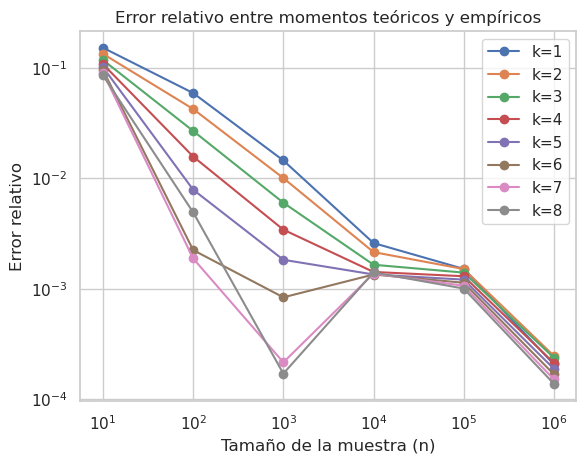

In [195]:
#Ahora queremos graficar los errores absolutos en funcion del tamaño de la muestra
#Para esto vamos a guardar los errores absolutos en una lista y luego graficarlos

errores = {k: [] for k in range(1, 9)}

for k in range(1, 9):
    for n in tamaños_muestra:
        datos = rfx.gclr(10, 1664525, 1013904223, 2**32, n)
        mom_emp = rfx.mome(datos, k)
        mom_teo = rfx.momt(k)
        errores[k].append(np.abs(mom_emp - mom_teo))
#Notese que estamos usando los parametros "buenos" para generar los numeros pseudoaleatoriosn


#Graficamos los errores absolutos en funcion del tamaño de la muestra

for k in range(1, 9):
    plt.plot(tamaños_muestra, errores[k], marker='o', label=f'k={k}')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Tamaño de la muestra (n)')
plt.ylabel('Error relativo')
plt.title('Error relativo entre momentos teóricos y empíricos')
plt.legend()
plt.grid(True)
plt.show()


Notamos claramente como a medida que la muestra aumenta, menor se hacen los errores. De hecho, disminuyen de forma exponencial.

Se nota que hay un máximo de divergencia al rededor del valor $10³$, luego los errores son similares entre si, hacercandose cada vez mas entre si.

O sea, a grandes valores de n, el valor de los errores absolutos entre los momentos es siempre menor.

#### (b) Computar el numero random $\Delta x$ en el rango [$-\sqrt{2}$,$\sqrt{2}$], y otro en $\Delta y$ en el mismo rango. Ralizar varias _caminatas_ aleatorias de $N = 1000$ pasos, comenzando en el origen del plano (con semillas distintas). Calular el valor de expectación de la distancia al orgien $R$ como función del paso $N$ y $\sqrt{N}$

##### Ahora buscamos implementar de manera directa el glc, particularmente para studiar el _random walk_, util para modelar ciertos fenomenos físicos como el movimiento browniano, la difusión de calor y demás fenomenos _estocásticos_ complejos.

Esto es tam simple como ubicar en la coordenadas $x$ e $y$ un generador de numero aleatorio con semilla que vaya recorriendo valores entre $-\sqrt{2}$ y $\sqrt{2}$, con lo cual, usando la función gclr, y reescalandola, obtendremos lo que buscamos.

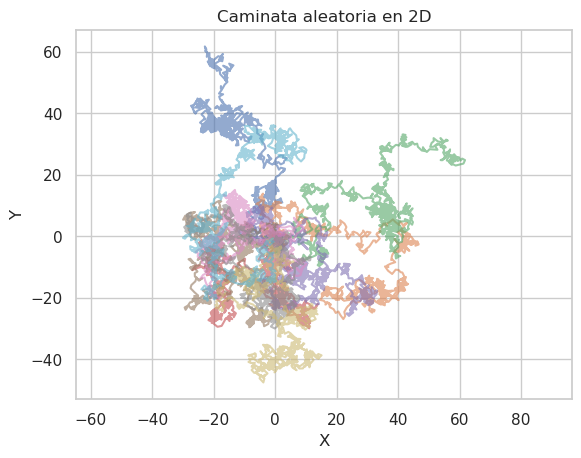

In [223]:
# Ahora busco generar una caminata aleatoria en 2D
# Para esto voy a generar dos listas de números pseudoaleatorios, una para las coordenadas x y otra para las coordenadas y
# Luego voy a ir sumando los números generados

K=10 # Cantidad de caminatas
N=1000 # Cantidad de pasos por caminata


x = np.zeros((K, N)) # Matriz para almacenar las coordenadas x de las K caminatas
y = np.zeros((K, N)) # Matriz para almacenar las coordenadas y de las K caminatas

# Generamos K caminatas aleatorias en 2D
# Cada caminata tiene N pasos
# Usamos diferentes semillas para cada caminata
# Usamos los parametros "buenos" para generar los numeros pseudoaleatorios
# El algoritmo basicamente genera dos listas de números pseudoaleatorios, 
# una para las coordenadas x y otra para las coordenadas y
# Luego va sumando los números generados para obtener las coordenadas de cada paso de la caminata

for k in range(K):
    
    pasos_x = rfx.gclr(1*k, 1664525, 1013904223, 2**32, N)
    pasos_y = rfx.gclr(2+k, 1664525, 1013904223, 2**32, N)
    
    # Reescalamos los pasos para que estén en el rango [-sqrt(2), sqrt(2)]
    pasos_x = (pasos_x) *2 * np.sqrt(2) - np.sqrt(2)
    pasos_y = (pasos_y) *2 * np.sqrt(2) - np.sqrt(2)

    x[k] = np.cumsum(pasos_x) # Suma acumulativa para obtener las coordenadas x
    y[k] = np.cumsum(pasos_y) # Suma acumulativa para obtener las coordenadas y
    
    plt.plot(x[k], y[k], alpha=0.6)

# Graficamos las caminatas aleatorias
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Caminata aleatoria en 2D')
plt.axis('equal')
plt.grid(True)
plt.show()

Vemos que a simple vista no hay ninguna correlación clara, aunque vemos que la caminata no se extiende tanto en el espacio como uno tal vez esperaría. Para cuantificar de alguna forma este comportamiento tratamos de determinar el valor $E[R_N]$ (Valor Esperado de la Distancia).

Cada paso en la caminata es un $\Delta \vec{r_i}=(\Delta x_i,\Delta y_i)$. Luego de dar N pasos el valor el valor será $\vec R_N=\sum_{i=1}^{N} \Delta \vec{r_i}=(X_N, Y_N)$. Entonces la distancia al orgien es $R_N = \|\vec {R_N}\|=\sqrt{X_N²+Y_N²}$. 

Este valor lo queremos comparar con su evolución en pasos y posteriormente con su evolicion en función de $\sqrt{n}$. Veremos finalmente que $R_N \propto \sqrt{N}$.


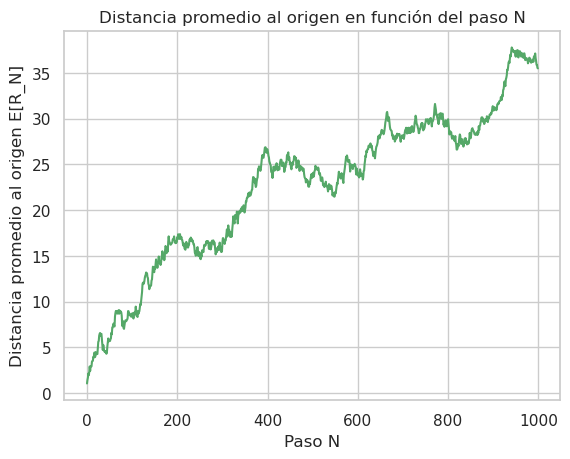

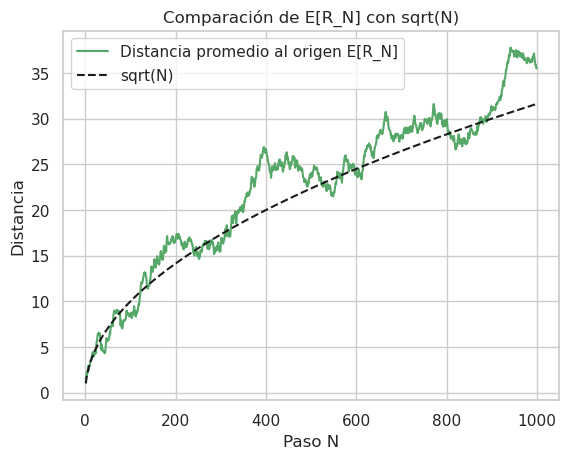

In [228]:
#Ahora busco el valor de distancia al origen en función del paso N
#Para esto voy a calcular la distancia al origen para cada paso de cada caminata
#Luego voy a promediar las distancias al origen para cada paso N


distancias_promedio = np.zeros(N) # Lista para almacenar las distancias promedio al origen para cada paso N
for n in range(N):
    distancias_promedio[n] = np.mean(np.sqrt(x[:, n]**2 + y[:, n]**2)) # Promedio de las distancias al origen para el paso n

# Graficamos la distancia promedio al origen en función del paso N
plt.plot(range(N), distancias_promedio, color='g')
plt.xlabel('Paso N')
plt.ylabel('Distancia promedio al origen E[R_N]')
plt.title('Distancia promedio al origen en función del paso N')
plt.grid(True)
plt.show() 

# Quiero comparar con la funcion sqrt(N)
# Para esto voy a graficar la función sqrt(N) junto con la distancia promedio al origen
# Notese que la función sqrt(N) no tiene sentido para N=0, por lo que voy a graficar desde N=1
plt.plot(range(1, N), distancias_promedio[1:], label='Distancia promedio al origen E[R_N]', color='g')
plt.plot(range(1, N), np.sqrt(range(1, N)), label='sqrt(N)', color='k', linestyle='--')
plt.xlabel('Paso N')
plt.ylabel('Distancia')
plt.title('Comparación de E[R_N] con sqrt(N)')
plt.legend()
plt.grid(True)
plt.show()

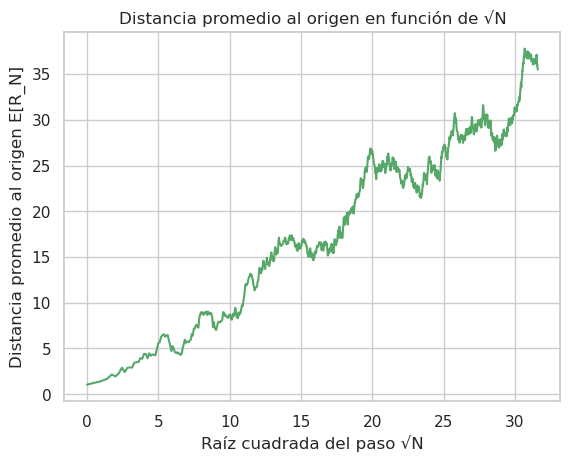

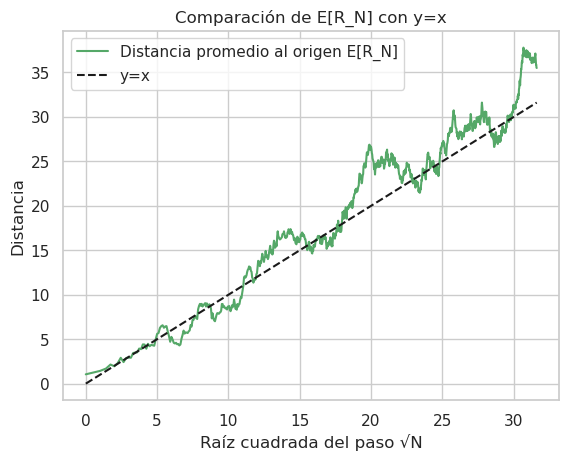

In [229]:
# Ahora buscamos graficar la distancia promedio al origen en función de la raiz cuadrada del paso N
# Esto es para verificar que la distancia promedio al origen crece como la raiz cuadrada del paso N
# Lo cual es una propiedad conocida de las caminatas aleatorias 

plt.plot(np.sqrt(range(N)), distancias_promedio, color='g')
plt.xlabel('Raíz cuadrada del paso √N')
plt.ylabel('Distancia promedio al origen E[R_N]')
plt.title('Distancia promedio al origen en función de √N')
plt.grid(True)
plt.show()

#Ahora quiero comparar la distancia promedio al origen con la raiz cuadrada del paso N
#Para esto voy a graficar la distancia promedio al origen en función de la raiz cuadrada del paso N
#Y voy a graficar la función identidad para ver si las dos curvas coinciden
#Si las dos curvas coinciden, entonces la distancia promedio al origen crece como la raiz cuadrada del paso N   

plt.plot(np.sqrt(range(N)), distancias_promedio, label='Distancia promedio al origen E[R_N]', color='g')
plt.plot(np.sqrt(range(N)), np.sqrt(range(N)), label='y=x', color='k', linestyle='--')
plt.xlabel('Raíz cuadrada del paso √N')
plt.ylabel('Distancia')
plt.title('Comparación de E[R_N] con y=x')
plt.legend()
plt.grid(True)
plt.show()

Debido a la naturaleza de la distribución elegida vemos que $R_N \propto \sqrt{N}$.

De momento vimos aplicaciones básicas para generar números pseudoaleatorios y su uso en el cálculo de momentos y caminatas aleatorias.

Ahora bien, este no es el único algoritmo que tenemos para generar numeros pseudoaleatorios. Un nuevo gran ejemplo de esto es el _Generador de Fibonacci con Retardo_.


